Подключение библиотек

In [1]:
import pandas as pd # Анализ данных
import numpy as np  # Поддержка многомерных массивов
import seaborn as sns
import matplotlib.pyplot as plt # Интерфейс визуализаций
from sklearn import preprocessing

Чтение датасета

In [2]:
df = pd.read_csv("valid.csv")

C:\Users\artem\AppData\Local\Temp\ipykernel_896\3583057822.py:1: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,91,95,96,97,99,131,132,133,135,136,140,141,142,144,145,146,147,148,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,207,208,211,212,213,215,216,239,240,241,243,244,245,459,467,563,567,571,575,579,580,583,611,612,795,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1047,1055,1063,1064,1071,1072,1073,1074,1175,1176,1177,1178,1179,1180,1181,1182,1277,1278,1281,1282,1447,1448,1449,1450,1451,1452,1453,1454,1653,1654,1656,2193,2194,2195,2196,2199) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("valid.csv")


Просмотр данных о датасете (кол-во строк и столбцов)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Columns: 2666 entries, report_date to col2663
dtypes: float64(2329), int64(3), object(334)
memory usage: 74.1+ MB


Просмотр пропущенных значений

<Axes: >

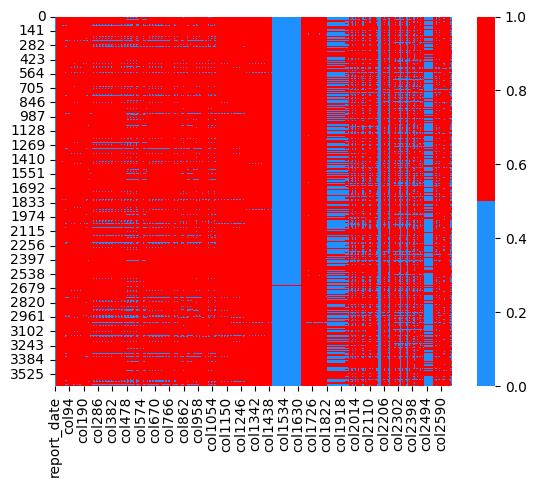

In [4]:
# Тепловая карта пропущенных значений
cols = df.columns # Все столбцы

# красный цвет - пропущенные данные, синий - не пропущенные
colours = ['#1E90FF', '#FF0000'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

Удаление столбцов, где пропущенных значений более 10%, дубликатов, незаполненных строк и вывод тепловой карты

In [5]:
# Удаление столбцов с более чем 10% пропущенных значений
threshold = 0.1 * len(df)  # 10% от общего количества строк
df = df.dropna(axis=1, thresh=len(df) - threshold)

# Удаление незаполненных строк
df = df.dropna()  # Удаляем строки, в которых есть хотя бы одно пропущенное значение

# Проверка и удаление дубликатов
df = df.drop_duplicates()  # Удаляем дубликаты

In [6]:
# Удаление столбцов с типом данных object
df = df.select_dtypes(exclude=['object'])

<Axes: >

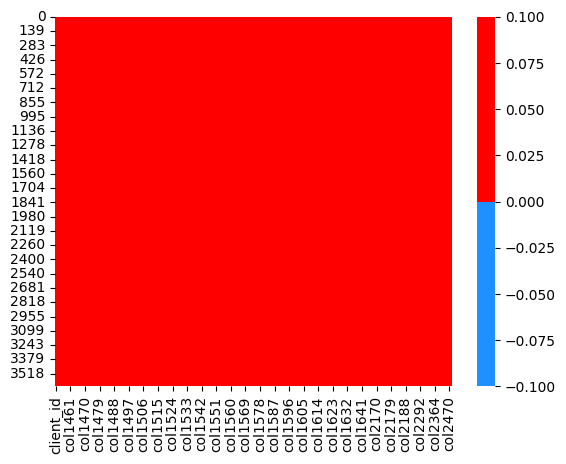

In [7]:
# Тепловая карта пропущенных значений
cols = df.columns # Все столбцы

# красный цвет - пропущенные данные, синий - не пропущенные
colours = ['#1E90FF', '#FF0000'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [8]:
df.info()   #Просмотр обновленной информации

<class 'pandas.core.frame.DataFrame'>
Index: 3367 entries, 0 to 3641
Columns: 245 entries, client_id to col2663
dtypes: float64(242), int64(3)
memory usage: 6.3 MB


Кодирование и вывод корреляционной матрицы

In [9]:
# Напишем функцию, которая принимает на вход наши данные, кодирует числовыми значениями категориальные признаки
# и возвращает обновленный данные и сами кодировщики
def number_encode_features(init_df):
    result = init_df.copy() #копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == 'object': #object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() #для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) #применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

encoded_data, encoders = number_encode_features(df) #Теперь encoded data содержит закодированные категориальные признаки

<Axes: >

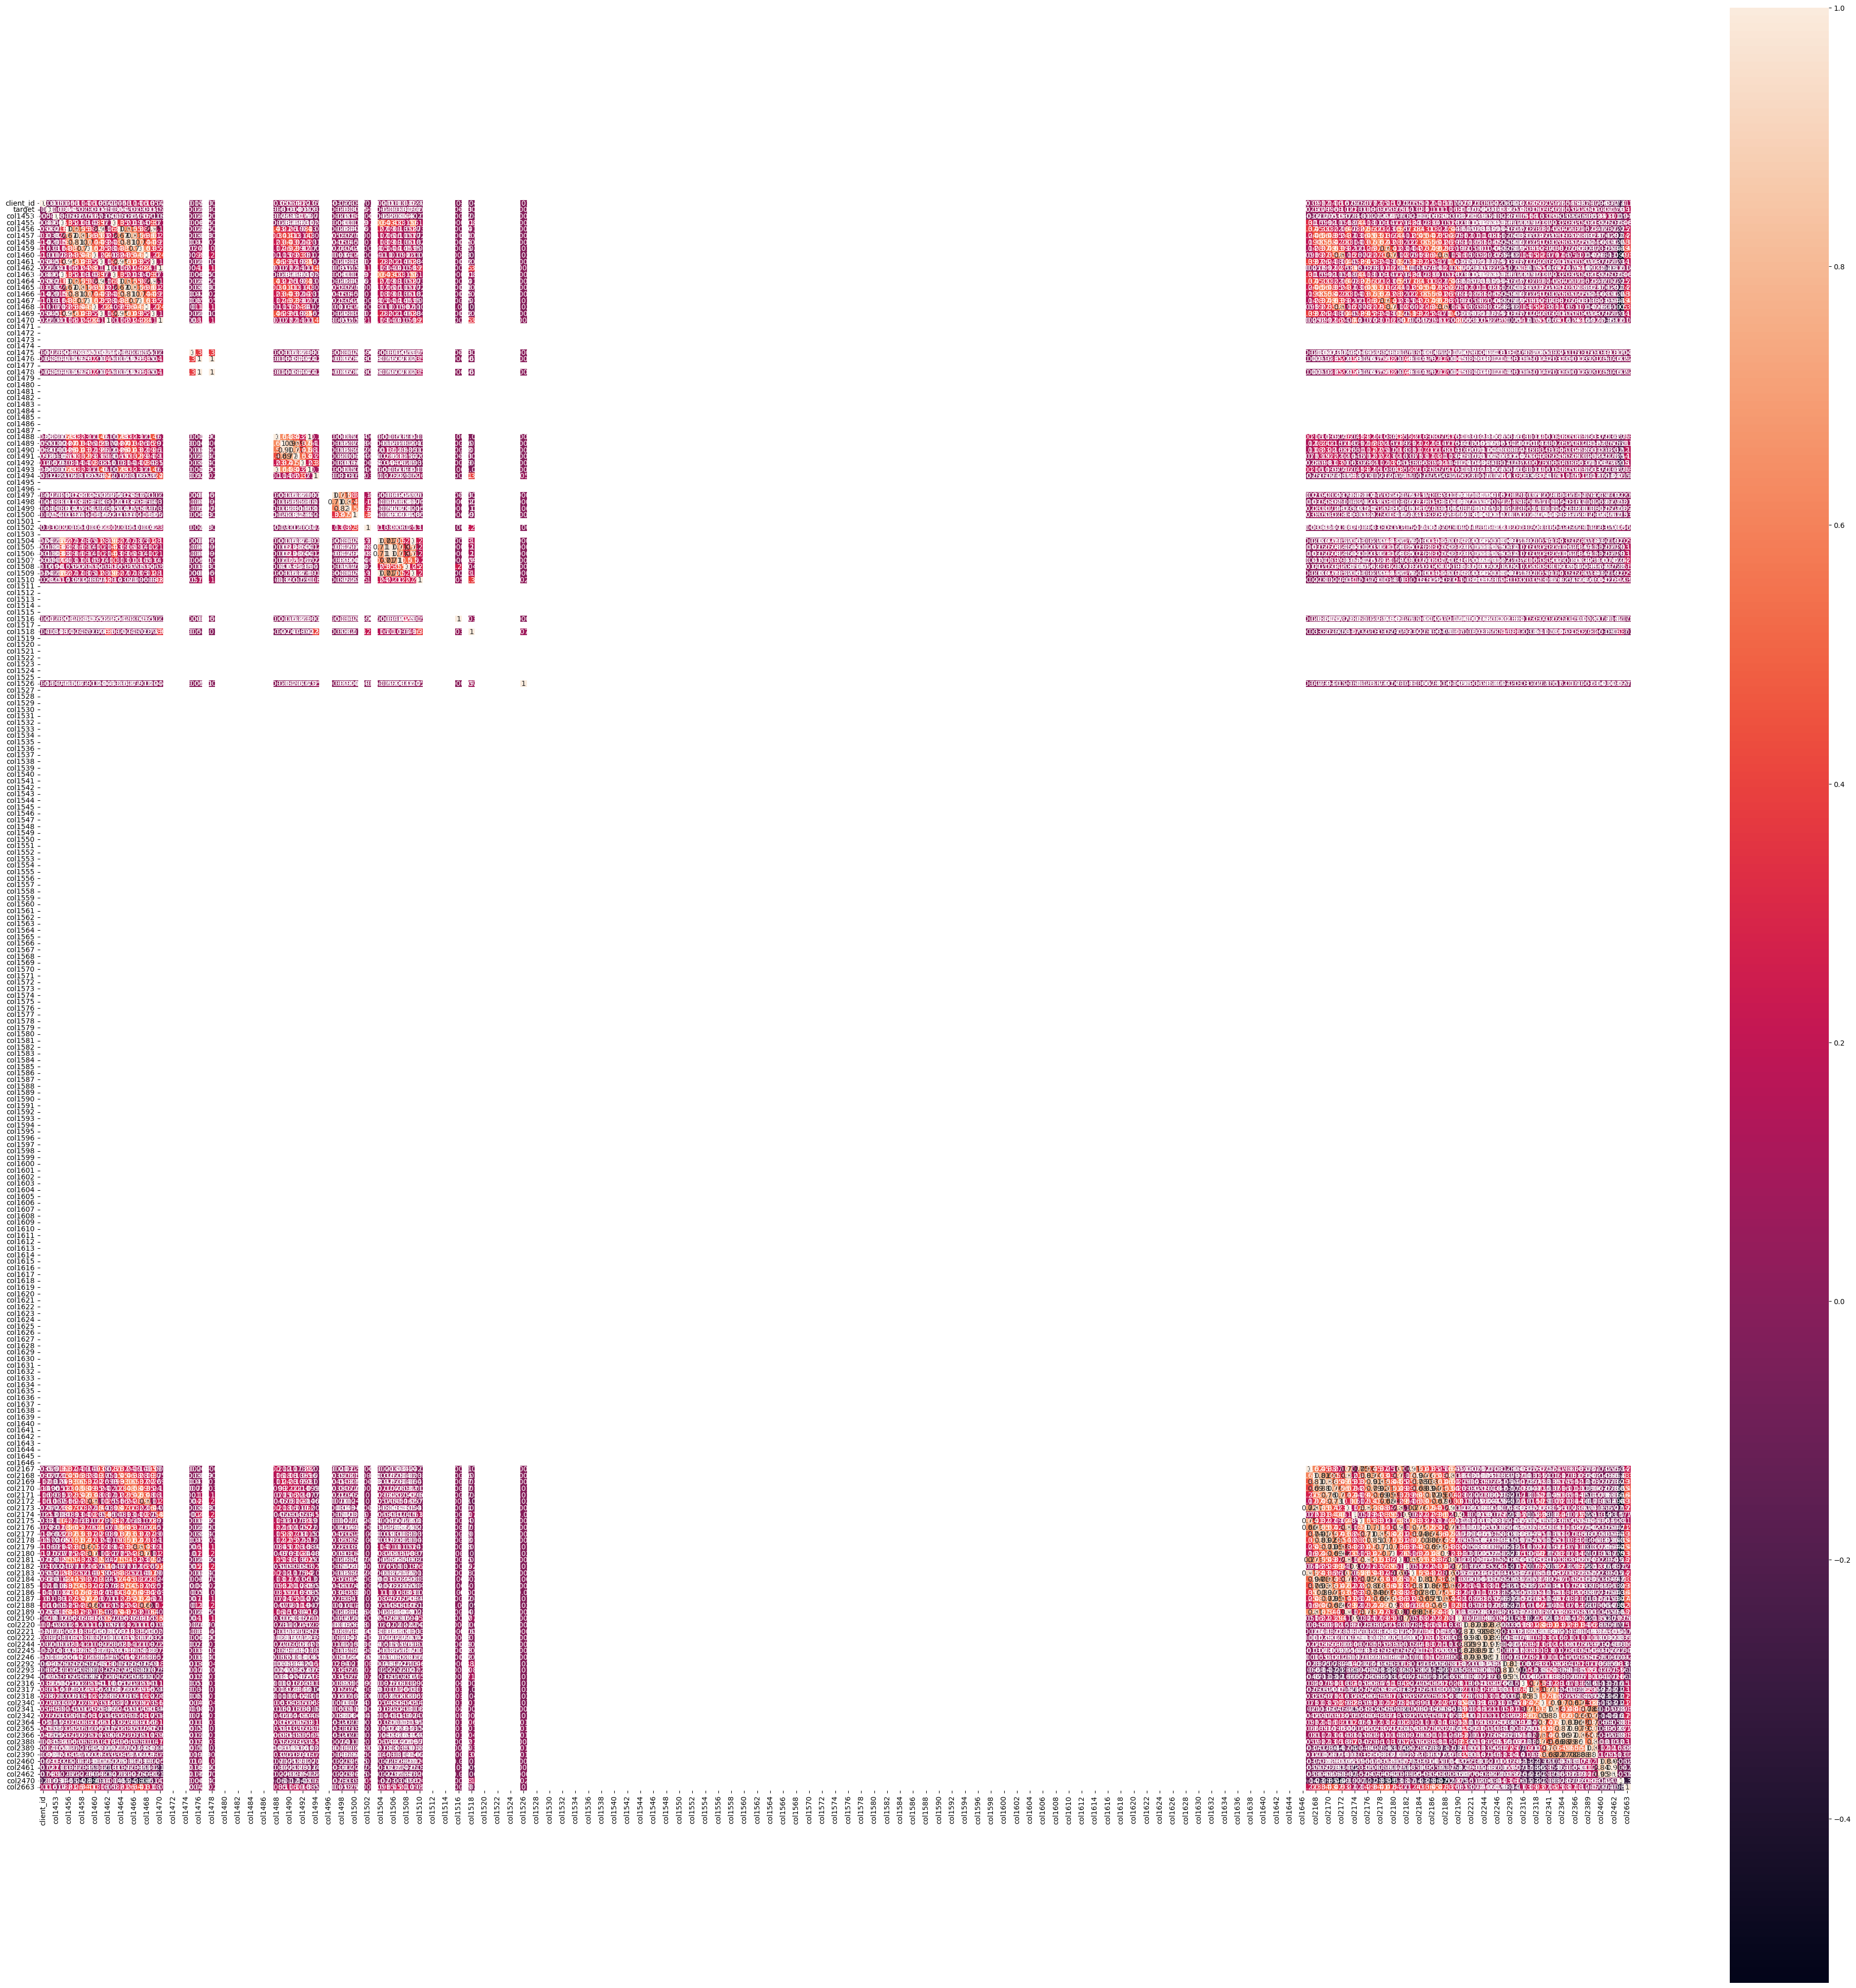

In [10]:
plt.figure(figsize = (50,50))
encoded_data, encoders = number_encode_features(df)

sns.heatmap(encoded_data.corr(), square=True, annot=True)

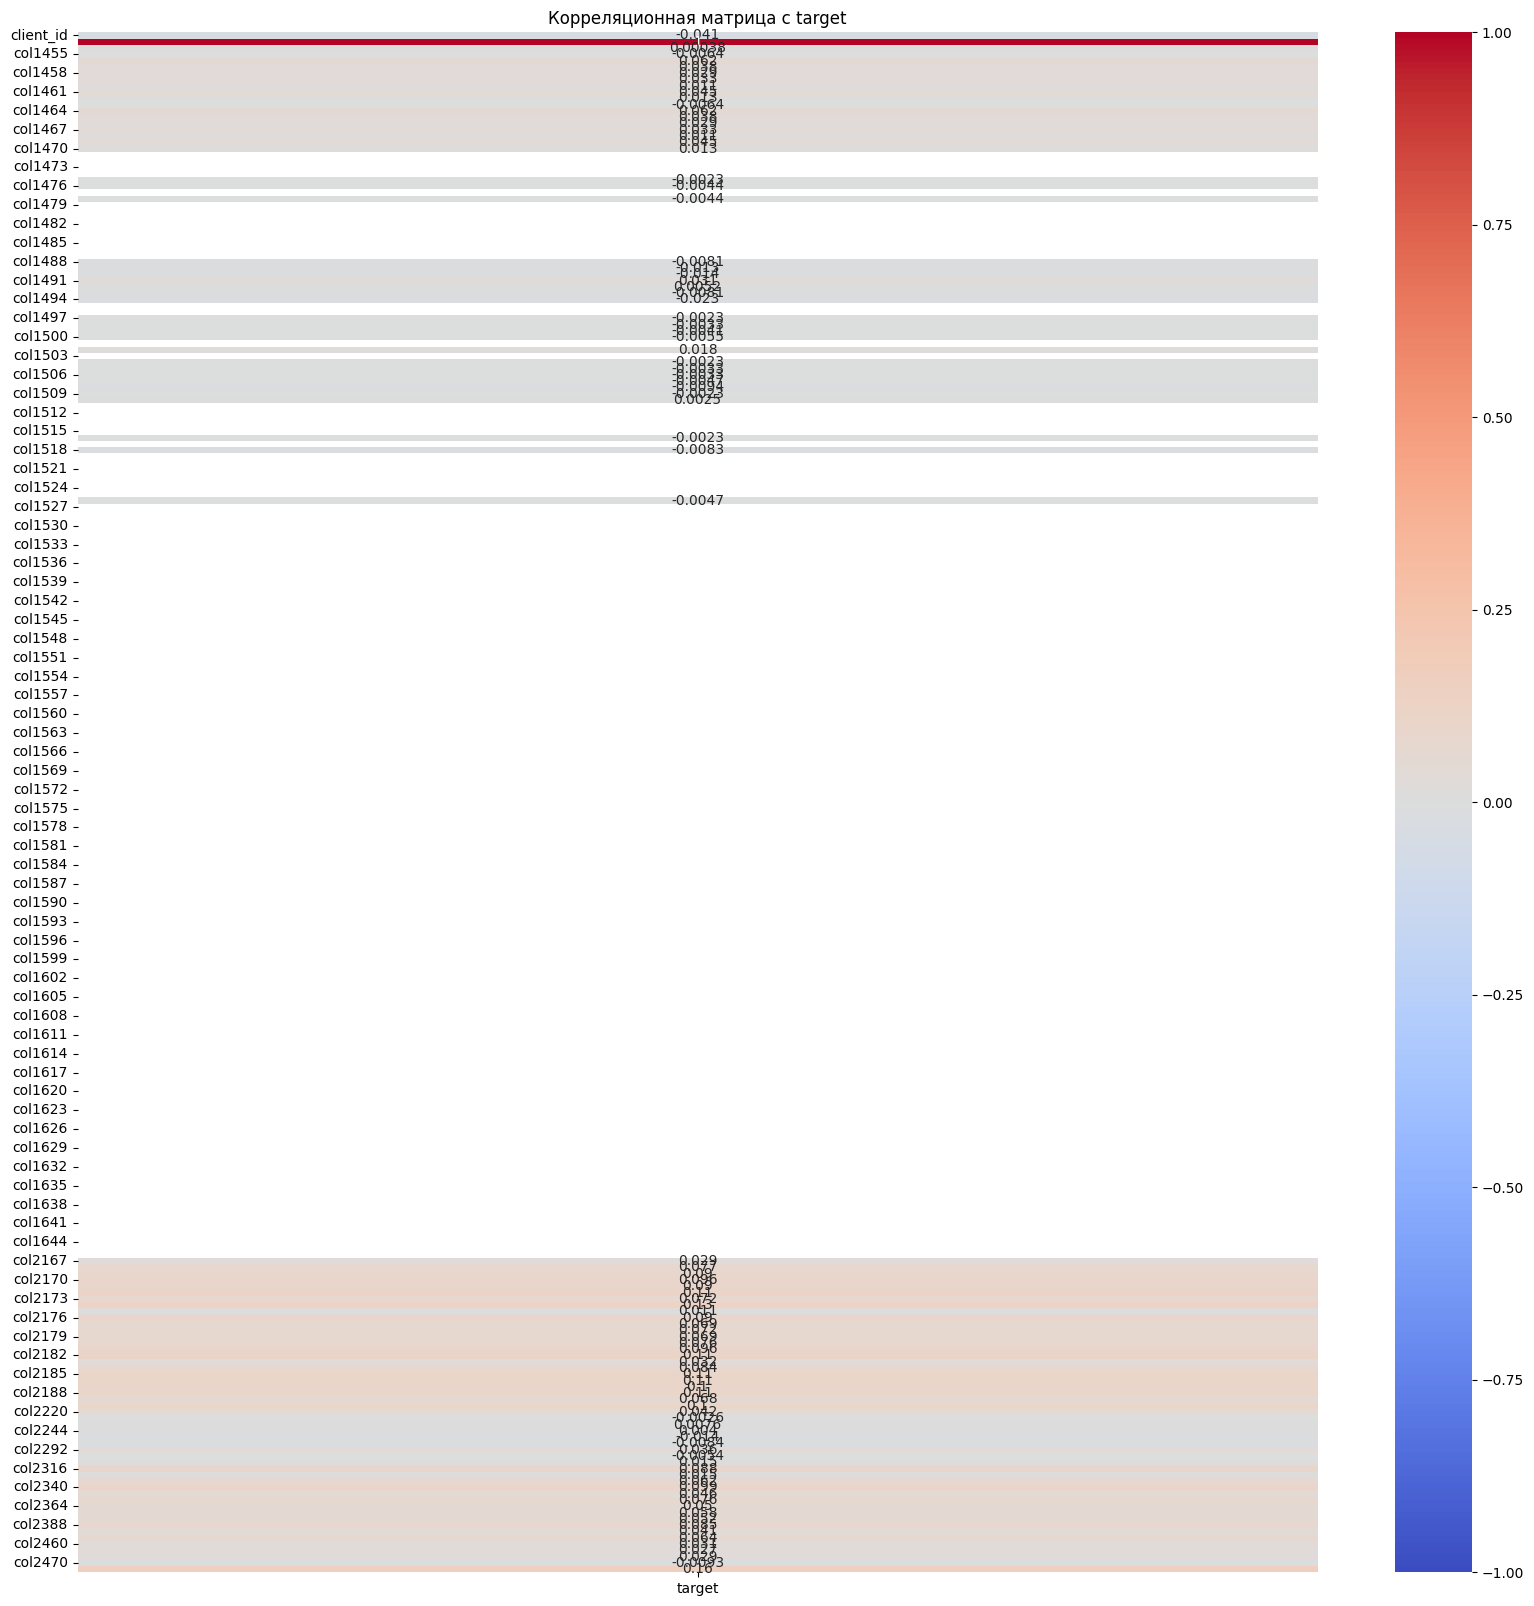

In [11]:
encoded_data, encoders = number_encode_features(df)

# Вычисляем корреляцию
correlation_matrix = encoded_data.corr()

# Создаем тепловую карту
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix[['target']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Настраиваем заголовок
plt.title('Корреляционная матрица с target')
plt.show()

In [12]:
# Вычисляем корреляционную матрицу
correlation_matrix = df.corr()

# Получаем корреляцию с целевой переменной
correlation_with_target = correlation_matrix['target']

# Отбираем признаки с положительной или нулевой корреляцией
positive_features = correlation_with_target[correlation_with_target >= 0].index.tolist()

# Удаляем признаки с отрицательной корреляцией
df = df[positive_features]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3367 entries, 0 to 3641
Data columns (total 65 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   target   3367 non-null   int64  
 1   col1453  3367 non-null   int64  
 2   col1456  3367 non-null   float64
 3   col1457  3367 non-null   float64
 4   col1458  3367 non-null   float64
 5   col1459  3367 non-null   float64
 6   col1460  3367 non-null   float64
 7   col1461  3367 non-null   float64
 8   col1462  3367 non-null   float64
 9   col1464  3367 non-null   float64
 10  col1465  3367 non-null   float64
 11  col1466  3367 non-null   float64
 12  col1467  3367 non-null   float64
 13  col1468  3367 non-null   float64
 14  col1469  3367 non-null   float64
 15  col1470  3367 non-null   float64
 16  col1491  3367 non-null   float64
 17  col1492  3367 non-null   float64
 18  col1502  3367 non-null   float64
 19  col1510  3367 non-null   float64
 20  col2167  3367 non-null   float64
 21  col2168  3367 non-n

In [14]:
df_cleaned = df.to_csv("cleanedValid.csv", index=False)  # Сохранение в новый файл